In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib as mpl

In [15]:
df = pd.read_csv('Datasets/PTEN_MCF10A_predictions_ref_set_binary_new.csv',
                index_col=False)
print(df.head(12))

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  Cum_score  ground truth
0      K6E        0.3311  26.6     67     0.155  0.99   1.623520           NaN
1      K6I        0.4544  27.3     64     0.244  1.00   1.888279           NaN
2     R15S        0.3870  25.0     65     0.123  1.00   2.581101           1.0
3     M35V        0.3606  25.0     44     0.914  1.00   4.783403           1.0
4     P38H        0.3521  26.1     44     1.000  1.00   3.080331           NaN
5     G44D        0.6232  26.0     65     0.968  1.00  -0.216137           1.0
6     A79T        0.5711  23.0    -95     0.005  0.41   0.610590           NaN
7     D92N        0.2677  28.8     90     1.000  1.00   0.091202           NaN
8     H93Q        0.3301  26.1     77     1.000  1.00  -0.030278           NaN
9     H93R        0.3930  27.0     83     0.998  0.97   3.108621           NaN
10   I101F        0.8803  26.0      6     0.998  1.00   2.380877           NaN
11   I101T        0.7138  29.0     44     0.998  1.0

In [16]:
df = df.dropna().reset_index(drop=True)
print(df)

   variant  MCF10A score  CADD  SNAP2  PolyPhen  SIFT  Cum_score  ground truth
0     R15S        0.3870  25.0     65     0.123  1.00   2.581101           1.0
1     M35V        0.3606  25.0     44     0.914  1.00   4.783403           1.0
2     G44D        0.6232  26.0     65     0.968  1.00  -0.216137           1.0
3    H123Q        0.9934  25.0     82     0.998  0.98   4.544401           1.0
4    H123Y        0.6383  25.0     80     0.996  1.00   4.895643           1.0
5    C124S        0.8797  27.3     83     1.000  1.00   4.451413           1.0
6    C124R        0.6986  28.0     98     0.999  1.00   1.027467           1.0
7    G127R        0.9753  29.0     91     1.000  1.00   1.477588           1.0
8    G129R        0.8214  29.0     92     1.000  1.00   5.409764           1.0
9    G129E        0.8841  32.0     95     1.000  1.00   3.153431           1.0
10   R130Q        0.5361  34.0     96     0.998  0.98   2.040164           1.0
11   R130P        0.9134  34.0     93     0.999  1.0

In [17]:
df['ground truth'].astype(int)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    1
25    0
26    0
Name: ground truth, dtype: int64

In [18]:
# calculate ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_MCF10A, tpr_MCF10A, thresholds = roc_curve(df['ground truth'],
                                               df['MCF10A score'])
fpr_CADD, tpr_CADD, thresholds = roc_curve(df['ground truth'],
                                               df['CADD'])
fpr_SNAP2, tpr_SNAP2, thresholds = roc_curve(df['ground truth'],
                                               df['SNAP2'])
fpr_SIFT, tpr_SIFT, thresholds = roc_curve(df['ground truth'],
                                               df['SIFT'])
fpr_PolyPhen, tpr_PolyPhen, thresholds = roc_curve(df['ground truth'],
                                               df['PolyPhen'])
fpr_yeast, tpr_yeast, thresholds = roc_curve(df['ground truth'],
                                               df['Cum_score'])

In [19]:
# calculate the AUC for ROC curves

roc_auc_MCF10A = roc_auc_score(df['ground truth'], df['MCF10A score'])
roc_auc_CADD = roc_auc_score(df['ground truth'], df['CADD'])
roc_auc_SNAP2 = roc_auc_score(df['ground truth'], df['SNAP2'])
roc_auc_SIFT = roc_auc_score(df['ground truth'], df['SIFT'])
roc_auc_PolyPhen = roc_auc_score(df['ground truth'], df['PolyPhen'])
roc_auc_yeast = roc_auc_score(df['ground truth'], df['Cum_score'])

print('The ROC-AUC for {0} is {1:.3f}.'.format('MCF10A', roc_auc_MCF10A))
print('The ROC-AUC for {0} is {1:.3f}.'.format('CADD', roc_auc_CADD))
print('The ROC-AUC for {0} is {1:.3f}.'.format('SNAP2', roc_auc_SNAP2))
print('The ROC-AUC for {0} is {1:.3f}.'.format('SIFT', roc_auc_SIFT))
print('The ROC-AUC for {0} is {1:.3f}.'.format('PolyPhen2', roc_auc_PolyPhen))
print('The ROC-AUC for {0} is {1:.3f}.'.format('yeast', roc_auc_yeast))

The ROC-AUC for MCF10A is 0.944.
The ROC-AUC for CADD is 0.960.
The ROC-AUC for SNAP2 is 0.984.
The ROC-AUC for SIFT is 0.984.
The ROC-AUC for PolyPhen2 is 1.000.
The ROC-AUC for yeast is 0.881.


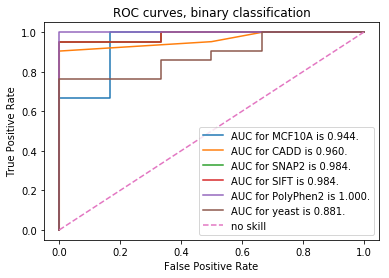

In [20]:
# plot the ROC curves for all the models
fig, ax = plt.subplots()
# plot the different scores
ax.plot(fpr_MCF10A, tpr_MCF10A, label='AUC for {0} is {1:.3f}.'.format('MCF10A', roc_auc_MCF10A))
ax.plot(fpr_CADD, tpr_CADD, label='AUC for {0} is {1:.3f}.'.format('CADD', roc_auc_CADD))
ax.plot(fpr_SNAP2, tpr_SNAP2, label='AUC for {0} is {1:.3f}.'.format('SNAP2', roc_auc_SNAP2))
ax.plot(fpr_SIFT, tpr_SIFT, label='AUC for {0} is {1:.3f}.'.format('SIFT', roc_auc_SIFT))
ax.plot(fpr_PolyPhen, tpr_PolyPhen, label='AUC for {0} is {1:.3f}.'.format('PolyPhen2', roc_auc_PolyPhen))
ax.plot(fpr_yeast, tpr_yeast, label='AUC for {0} is {1:.3f}.'.format('yeast', roc_auc_yeast))

# plot no skill line
ax.plot([0, 1], [0, 1], linestyle='--', label='no skill')

#ax.plot(r_SIFT, p_SIFT, label='SIFT')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curves, binary classification')
legend = ax.legend()

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/roc_binary.pdf', transparent=True, dpi=200)

plt.show()

In [11]:
# calculate precision-recall curve
p_MCF10A, r_MCF10A, thresholds = precision_recall_curve(
    df['ground truth'], df['MCF10A score'])
p_CADD, r_CADD, thresholds = precision_recall_curve(
    df['ground truth'], df['CADD'])
p_SNAP2, r_SNAP2, thresholds = precision_recall_curve(
    df['ground truth'], df['SNAP2'])
p_SIFT, r_SIFT, thresholds = precision_recall_curve(
    df['ground truth'], df['SIFT'])
p_PolyPhen, r_PolyPhen, thresholds = precision_recall_curve(
    df['ground truth'], df['PolyPhen'])

In [12]:
# calculate precision-recall AUC
from sklearn.metrics import auc

auc_MCF10A = auc(r_MCF10A, p_MCF10A)
auc_CADD = auc(r_CADD, p_CADD)
auc_SNAP2 = auc(r_SNAP2, p_SNAP2)
auc_SIFT = auc(r_SIFT, p_SIFT)
auc_PolyPhen = auc(r_PolyPhen, p_PolyPhen)

print('The AUC for {0} is {1:.3f}.'.format('MCF10A', auc_MCF10A))
print('The AUC for {0} is {1:.3f}.'.format('CADD', auc_CADD))
print('The AUC for {0} is {1:.3f}.'.format('SNAP2', auc_SNAP2))
print('The AUC for {0} is {1:.3f}.'.format('SIFT', auc_SIFT))
print('The AUC for {0} is {1:.3f}.'.format('PolyPhen2', auc_PolyPhen))

The AUC for MCF10A is 0.985.
The AUC for CADD is 0.938.
The AUC for SNAP2 is 0.934.
The AUC for SIFT is 0.935.
The AUC for PolyPhen2 is 0.914.


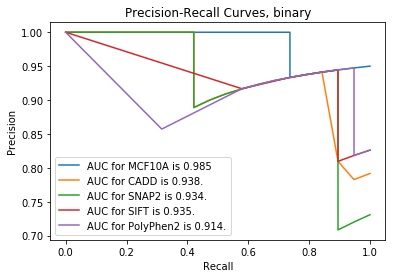

In [13]:
# plot the precision-recall curve for the model
fig, ax = plt.subplots()
ax.plot(r_MCF10A, p_MCF10A, label='AUC for {0} is {1:0.3f}'.format('MCF10A',auc_MCF10A))
ax.plot(r_CADD, p_CADD, label='AUC for {0} is {1:.3f}.'.format('CADD', auc_CADD))
ax.plot(r_SNAP2, p_SNAP2, label='AUC for {0} is {1:.3f}.'.format('SNAP2', auc_SNAP2))
ax.plot(r_SIFT, p_SIFT, label='AUC for {0} is {1:.3f}.'.format('SIFT', auc_SIFT))
ax.plot(r_PolyPhen, p_PolyPhen, label='AUC for {0} is {1:.3f}.'.format('PolyPhen2', auc_PolyPhen))


ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curves, binary')
legend = ax.legend()

mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/Precision-Recall binary.pdf', transparent=True, dpi=200)

plt.show()

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(df['ground truth'], df['MCF10A score'])

ValueError: Classification metrics can't handle a mix of binary and continuous targets